## Statistical Data Analysis Graphically-Part one

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables(features). Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three *seaborn* functions in this tutorial. The one we will use most is *relplot()*. This is a **figure-level function** for visualizing statistical relationships using two common approaches: scatter plots and line plots. *relplot()* combines a **FacetGrid** with one of two **axes-level functions**:

* *scatterplot()* (with kind="scatter"; the default)
* *lineplot()* (with kind="line")

Well before we discuss these three plots in detail,we need to clear some basics, like :

* what is **figure-level function** ?
* what is **axes- level function** ?
* how do they differ? how to tell which is which ?
* and what is this **FacetGrid** thing ?


Let us do that first. Note: basics of matplotlib helps a lot here as *seaborn* runs on top of this low level library and is is not easy to master, so very basics is enough and that I will cover in a different article.

### Figure-level and axes-level functions

How does figure-level functions like *relplot()* and *catplot()* work? It’s important to know about a major distinction between seaborn plotting functions. All “figure-level” functions are optimized for exploratory analysis because they set up the matplotlib figure containing the plot(s) and make it easy to spread out the visualization across multiple axes. They also handle some tricky business like putting the legend outside the axes. To do these things, they use a seaborn FacetGrid.

Each different figure-level plot **kind** argument combines a particular “axes-level” function with the FacetGrid object. For example, the scatter plots are drawn using the scatterplot() function, and the bar plots are drawn using the barplot() function. These functions are called “axes-level” because they draw onto a single matplotlib axes and don’t otherwise affect the rest of the figure.

The upshot is that the figure-level function needs to control the figure it lives in, while axes-level functions can be combined into a more complex matplotlib figure with other axes that may or may not have seaborn plots on them:

Let me illustrate this with an example:
First let us import the necessary libraries and a dataset.This time let us use **"tips"** dataset.
You can download or clone this dataset along with some other useful datasets which will help to learn *seaborn* from [here](https://github.com/mwaskom/seaborn-data)

In [24]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set(style="darkgrid")

In [26]:
df = pd.read_csv('./tips.csv')

In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


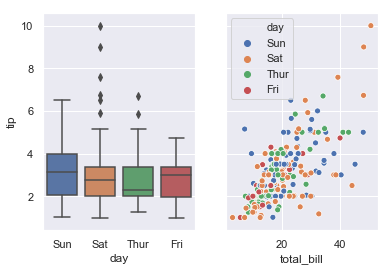

In [28]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=df, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=df, ax=axes[1])

See here the two axes-level plots namely *boxplot()* and *scatterplot()* need the **ax** argument which indicates the position of the plot in matplotlib figure object. 

Controling the size of the **figure-level functions** works a little bit differently than it does for other matplotlib figures. Instead of setting the overall figure size as opposed to matplotlib, the **figure-level functions** are parameterized by the size of each facet. And instead of setting the height and width of each facet, you control the height and aspect ratio (ratio of width to height). This parameterization makes it easy to control the size of the graphic without thinking about exactly how many rows and columns it will have, although it can be a source of confusion many a times:

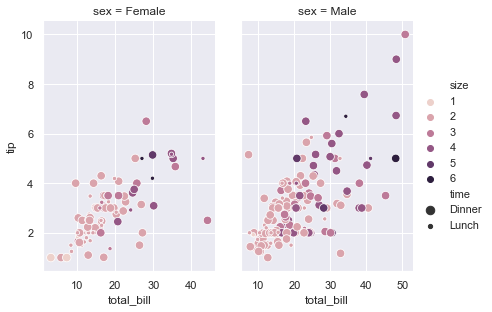

In [29]:

sns.relplot(x="total_bill", y="tip", col="sex",
            hue="size", size="time",
            height=4.5, aspect=2 / 3,
            facet_kws=dict(sharex=False),
            kind="scatter", legend="full", data=df)

The way you can tell whether a function is “figure-level” or “axes-level” is whether it takes an ax= parameter. You can also distinguish the two classes by their output type: axes-level functions return the matplotlib axes, while figure-level functions return the FacetGrid.



FacetGrid :Multi-plot grid for plotting conditional relationships.

This FacetGriad class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

It can also represent levels of a third varaible with the hue parameter, which plots different subets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

When using seaborn functions that infer semantic mappings from a dataset, care must be taken to synchronize those mappings across facets. In most cases, it will be better to use a figure-level function (e.g. relplot() or catplot()) than to use FacetGrid directly.

So let us not spend lot of time on understanding FacetGrid as we will be using figure-level functions most of the time. However the following notes on building structured multi-plot grids is interesting to know. 

When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice”, or “trellis” plotting, and it is related to the idea of [“small multiples”](https://en.wikipedia.org/wiki/Small_multiple). It allows a viewer to quickly extract a large amount of information about complex data. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.

To use these features, your data has to be in a Pandas DataFrame and it must take the form of what Hadley Whickam calls [“tidy” data](https://vita.had.co.nz/papers/tidy-data.pdf). In brief, that means your dataframe should be structured such that:
* each column is a variable  
* each row is an observation 
* and each type of observational unit forms a table value.

By the way, after a very technical stuff of read above. let me ask a simple question.
What is a Dataset from a data analysis point of view ?
Read next for an answer...


A **dataset** is a collection of values, usually either numbers (if quantitative) or strings (if
qualitative). Values are organised in two directions. Every value belongs to a **variable** and an
**observation**. A variable contains all values that measure the same underlying attribute (like
height, temperature, duration) across units. An observation contains all values measured on
the same unit (like a person, or a day, or a race) across attributes.

In Part ,we will discuss the three plots mentioned in the beginning of this article.